<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment9/Assignment_9_SSL_IDL_Meghana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Assignment


1.   Srinath Mannam (229750)
2.   Meghana Rao (234907)
3.   Govind Shukla (235192)

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Cifar10 Dataset

In [ ]:
(train_images,train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 10s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_data = train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
test_data = test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255

##Convolutional Autoencoder

In [ ]:
class Autoencoder:

  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.input_layer = tf.keras.Input((32, 32, 3))
    self.code_shape = 64
  
  def UNET(self):
    en_conv_layer_1 = tf.keras.layers.Conv2D((self.code_shape)*1,(3, 3), padding='same', activation='relu')(self.input_layer)
    en_conv_layer_1 = tf.keras.layers.Conv2D((self.code_shape)*1,(3, 3), padding='same', activation='relu')(en_conv_layer_1)
    pool_layer_1 = tf.keras.layers.MaxPool2D()(en_conv_layer_1)
    pool_layer_1 = tf.keras.layers.Dropout(0.25)(pool_layer_1)

    en_conv_layer_2 = tf.keras.layers.Conv2D((self.code_shape)*2,(3, 3), padding='same', activation='relu')(pool_layer_1)
    en_conv_layer_2 = tf.keras.layers.Conv2D((self.code_shape)*2,(3, 3), padding='same', activation='relu')(en_conv_layer_2)
    pool_layer_2 = tf.keras.layers.MaxPool2D()(en_conv_layer_2)
    pool_layer_2 = tf.keras.layers.Dropout(0.25)(pool_layer_2)

    en_conv_layer_3 = tf.keras.layers.Conv2D((self.code_shape)*4,(3, 3), padding='same', activation='relu')(pool_layer_2)
    en_conv_layer_3 = tf.keras.layers.Conv2D((self.code_shape)*4,(3, 3), padding='same', activation='relu')(en_conv_layer_3)
    pool_layer_3 = tf.keras.layers.MaxPool2D()(en_conv_layer_3)
    pool_layer_3 = tf.keras.layers.Dropout(0.25)(pool_layer_3)

    en_conv_layer_4 = tf.keras.layers.Conv2D((self.code_shape)*8,(3, 3), padding='same', activation='relu')(pool_layer_3)
    en_conv_layer_4 = tf.keras.layers.Conv2D((self.code_shape)*8,(3, 3), padding='same', activation='relu')(en_conv_layer_4)
    pool_layer_4 = tf.keras.layers.MaxPool2D()(en_conv_layer_4)
    pool_layer_4 = tf.keras.layers.Dropout(0.25)(pool_layer_4)


    en_conv_bottleneck_layer = tf.keras.layers.Conv2D((self.code_shape)*16,(3, 3), padding='same', activation='relu')(pool_layer_4)
    en_conv_bottleneck_layer = tf.keras.layers.Conv2D((self.code_shape)*16,(3, 3), padding='same', activation='relu')(en_conv_bottleneck_layer)

  
    de_conv_layer_4 = tf.keras.layers.Conv2DTranspose((self.code_shape)*8,(3,3), strides=(2,2), padding='same')(en_conv_bottleneck_layer)
    con_conv_layer_4 = tf.keras.layers.concatenate([de_conv_layer_4, en_conv_layer_4])
    con_conv_layer_4 = tf.keras.layers.Dropout(0.25)(con_conv_layer_4)
    con_conv_layer_4 = tf.keras.layers.Conv2D((self.code_shape)*8, (3,3), activation='relu', padding='same')(con_conv_layer_4)
    con_conv_layer_4 = tf.keras.layers.Conv2D((self.code_shape)*8, (3,3), activation='relu', padding='same')(con_conv_layer_4)
    
    
    de_conv_layer_3 = tf.keras.layers.Conv2DTranspose((self.code_shape)*8,(3,3), strides=(2,2), padding='same')(con_conv_layer_4)
    con_conv_layer_3 = tf.keras.layers.concatenate([de_conv_layer_3, en_conv_layer_3])
    con_conv_layer_3 = tf.keras.layers.Dropout(0.25)(con_conv_layer_3)
    con_conv_layer_3 = tf.keras.layers.Conv2D((self.code_shape)*4, (3,3), activation='relu', padding='same')(con_conv_layer_3)
    con_conv_layer_3 = tf.keras.layers.Conv2D((self.code_shape)*4, (3,3), activation='relu', padding='same')(con_conv_layer_3)
    
    de_conv_layer_2 = tf.keras.layers.Conv2DTranspose((self.code_shape)*8,(3,3), strides=(2,2), padding='same')(con_conv_layer_3)
    con_conv_layer_2 = tf.keras.layers.concatenate([de_conv_layer_2, en_conv_layer_2])
    con_conv_layer_2 = tf.keras.layers.Dropout(0.25)(con_conv_layer_2)
    con_conv_layer_2 = tf.keras.layers.Conv2D((self.code_shape)*2, (3,3), activation='relu', padding='same')(con_conv_layer_2)
    con_conv_layer_2 = tf.keras.layers.Conv2D((self.code_shape)*2, (3,3), activation='relu', padding='same')(con_conv_layer_2)
    
    de_conv_layer_1 = tf.keras.layers.Conv2DTranspose((self.code_shape)*8,(3,3), strides=(2,2), padding='same')(con_conv_layer_2)
    con_conv_layer_1 = tf.keras.layers.concatenate([de_conv_layer_1, en_conv_layer_1])
    con_conv_layer_1 = tf.keras.layers.Dropout(0.25)(con_conv_layer_1)
    con_conv_layer_1 = tf.keras.layers.Conv2D((self.code_shape)*3, (3,3), activation='relu', padding='same')(con_conv_layer_1)
    con_conv_layer_1 = tf.keras.layers.Conv2D((self.code_shape)*3, (3,3), activation='relu', padding='same')(con_conv_layer_1)
    
    output_layer = tf.keras.layers.Conv2D(3, (1,1), padding='same', activation='sigmoid')(con_conv_layer_1)

    return en_conv_bottleneck_layer, self.input_layer, output_layer

In [ ]:
def model_compile_fit_evaluate(input_layer, output_layer, train_data, test_data):
 
  #---model compile-----
  model = tf.keras.Model(input_layer, output_layer)
  model.compile(optimizer='adam', loss='MSE')
  
  model.summary()
  
  #---model fit------
  model.fit(train_data, train_data,
            epochs=3,
            batch_size=64,
            shuffle=True,
            validation_data=(test_data, test_data))

In [ ]:
autoencoder = Autoencoder()
encoder_layer, input_layer, output_layer = autoencoder.UNET()

####U-net Model Fit

In [ ]:
model_compile_fit_evaluate(input_layer, output_layer, train_data, test_data)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

####Custom Layer

####--------faced issues to separate encoder and decoder from unet architecture

In [ ]:
# def build_custom_layer(input, encoder_layers):
#   encoder = tf.keras.Model(input, encoder_layers)
#   encoder.trainable = False
#   #encoder.trainable = True
#   print(encoder.trainable_variables)
#   pool_layer = tf.keras.layers.MaxPool2D()(encoder_layers)
#   flatten = tf.keras.layers.Flatten()(pool_layer)
#   dense_layer_1 = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(flatten)
#   dense_layer_2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(dense_layer_1)
  
#   output = dense_layer_2

#   custom_model = tf.keras.Model(inputs=input, outputs=output)

#   return custom_model

##Denoise Autoencoder

In [ ]:
from skimage.util import random_noise

noise_factor = 0.07

train_data_noisy = random_noise(train_data, mode="s&p",clip=True, amount=noise_factor)
test_data_noisy = random_noise(test_data, mode="s&p",clip=True, amount=noise_factor)

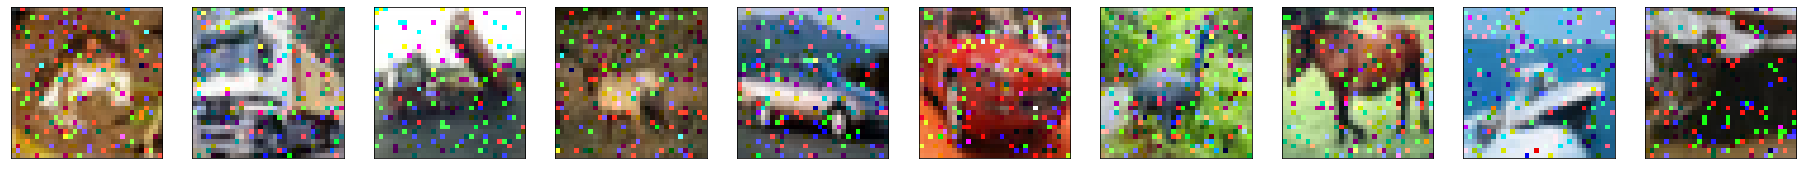

In [ ]:
plt.figure(figsize=(32, 32))
n=10
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(train_data_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = tf.keras.Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='MSE')
  
model.summary()
  
#---model fit------
model.fit(train_data_noisy, train_data,
          epochs=3,
          batch_size=64,
          shuffle=True,
          validation_data=(test_data_noisy, test_data))

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d_1[0][0]']               
                                                                                            

#Fashion_mnist Dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = (x_train.astype('float32') / 255)
x_test = (x_test.astype('float32') / 255)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(x_train.shape[0]).batch(512)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(100)

# pick a random subset
labeled_indices = np.random.choice(60000, replace=False, size=1000)

print("Original Dataset Size")
print ("Train Dataset Size: ", x_train.shape)
print ("Test Dataset Size: ", x_test.shape)

Original Dataset Size
Train Dataset Size:  (60000, 28, 28)
Test Dataset Size:  (10000, 28, 28)


In [ ]:
train_data_self = tf.data.Dataset.from_tensor_slices((x_train, x_train)).shuffle(x_train.shape[0]).batch(512)
test_data_self = tf.data.Dataset.from_tensor_slices((x_test, x_test)).batch(100)

# choose corresponding images and labels
x_train_subset = x_train[labeled_indices]
y_train_subset = y_train[labeled_indices]

train_subset_data = tf.data.Dataset.from_tensor_slices((x_train_subset, y_train_subset)).shuffle(x_train_subset.shape[0]).batch(100)

print("Subset Dataset Size")
print ("Train Subset Dataset Size: ", x_train_subset.shape)

Subset Dataset Size
Train Subset Dataset Size:  (1000, 28, 28)


## Simple Autoencoder

In [ ]:
bottleNeck = 64
input_shape = (28, 28)

#Encoder
image_input = tf.keras.Input(input_shape)  # flattened 28x28 MNIST images
flatten = tf.keras.layers.Flatten()(image_input)
enc_Layer1 = tf.keras.layers.Dense(256)(flatten)
enc_Layer2 = tf.keras.layers.Dense(128)(enc_Layer1)
encoding = tf.keras.layers.Dense(bottleNeck)(enc_Layer2)
encoder = tf.keras.Model(image_input, encoding, name="Encoder")

#Decoder
code_input = tf.keras.Input((bottleNeck,))
dec_Layer1 = tf.keras.layers.Dense(128)(code_input)
dec_Layer2 = tf.keras.layers.Dense(256)(dec_Layer1)
decoding = tf.keras.layers.Dense(784, tf.nn.sigmoid)(dec_Layer2)
decoding2 = tf.keras.layers.Reshape(input_shape)(decoding)
decoder = tf.keras.Model(code_input, decoding2, name="Decoder")

#Auto-Encoder
autoencoder = tf.keras.Model(image_input, decoder(encoder(image_input)), name="AutoEncoder")

#### Custom layer

In [ ]:
# Extended Model Head for Classification
layer1 =  tf.keras.layers.Dense(512)(encoding)
layer2 =  tf.keras.layers.Dense(256)(layer1)

logits = tf.keras.layers.Dense(10)(layer2)

classifier = tf.keras.Model(image_input, logits, name="Classifer")

In [ ]:
encoder.summary()
decoder.summary()
autoencoder.summary()
classifier.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
____________________________________

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(train_data_self, epochs=10)

Epoch 1/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0462
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0200
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0164
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0144
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0132
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0123
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0117
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0112
Epoch 9/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0108
Epoch 10/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0104


In [ ]:
autoencoder.evaluate(test_data_self)

100/100 [==============================] - 1s 3ms/step - loss: 0.0104


0.010370566509664059

In [ ]:
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

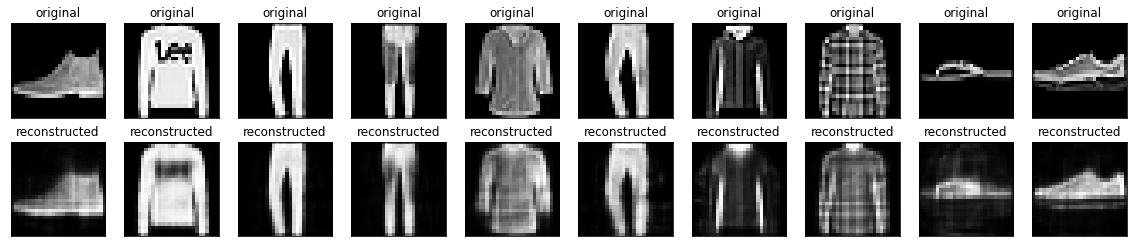

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#### With encoder trainable parameters

In [ ]:
print("ENCODER")  # no more trainable variables
print(encoder.trainable_variables)

ENCODER
[<tf.Variable 'dense_20/kernel:0' shape=(784, 256) dtype=float32, numpy=
array([[ 0.06891449,  0.00154723, -0.04967264, ..., -0.04502296,
         0.00168319,  0.0708426 ],
       [-0.06165712,  0.02493453, -0.04420934, ..., -0.06428798,
        -0.03337491, -0.00992196],
       [ 0.0095515 , -0.05278197, -0.00107916, ...,  0.00669935,
         0.01682746,  0.06175   ],
       ...,
       [-0.04435176, -0.00674585, -0.02106153, ...,  0.11843978,
        -0.05253906,  0.04336624],
       [-0.0353936 ,  0.01951492, -0.04474748, ...,  0.01202377,
         0.01085768,  0.02160309],
       [-0.00669999, -0.05112696, -0.00022031, ..., -0.00527754,
         0.03112667,  0.04831556]], dtype=float32)>, <tf.Variable 'dense_20/bias:0' shape=(256,) dtype=float32, numpy=
array([ 0.03962361, -0.06719264, -0.03453856, -0.07514604,  0.10357621,
       -0.10361512, -0.10203445, -0.06439561, -0.05463862,  0.08885454,
       -0.10201525,  0.1151893 ,  0.10655808, -0.09645178, -0.09078281,
       

In [ ]:
classifier.compile( optimizer=tf.optimizers.Adam(), 
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics   = tf.metrics.SparseCategoricalAccuracy(),)
classifier.summary()
classifier.fit(train_subset_data,epochs=10)
classifier.evaluate(test_data)

Model: "Classifer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 512)               33280     
                                                                 
 dense_27 (Dense)            (None, 256)               13

[0.7652156949043274, 0.7646999955177307]

####Without encoder trainable variables

In [ ]:
encoder.trainable = False 
print("ENCODER")  # no more trainable variables
print(encoder.trainable_variables)

ENCODER
[]


In [ ]:
classifier.compile( optimizer=tf.optimizers.Adam(), 
                    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics   = tf.metrics.SparseCategoricalAccuracy(),)
classifier.summary()
classifier.fit(train_subset_data, epochs=10)
classifier.evaluate(test_data)

Model: "Classifer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 512)               33280     
                                                                 
 dense_27 (Dense)            (None, 256)               13

[1.1854500770568848, 0.7728999853134155]

##References
https://ovgu-ailab.github.io/idl2021/ass9.html
https://www.tensorflow.org/tutorials/generative/autoencoder#second_example_image_denoising